# Grid approximation

Comes directly from an [O'Reilly book](https://learning.oreilly.com/library/view/bayesian-analysis-with/9781789341652/0c06dea8-a2b0-49e1-8f1b-28e318f29efe.xhtml) (behind a paywall), the chapter on Grid computing.

Also inspired by [3blue1brown: Binomial distributions | Probabilities of probabilities, part 1](https://www.youtube.com/watch?v=8idr1WZ1A7Q&t=13s).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [21]:
np.repeat([0, 1], (10, 3))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

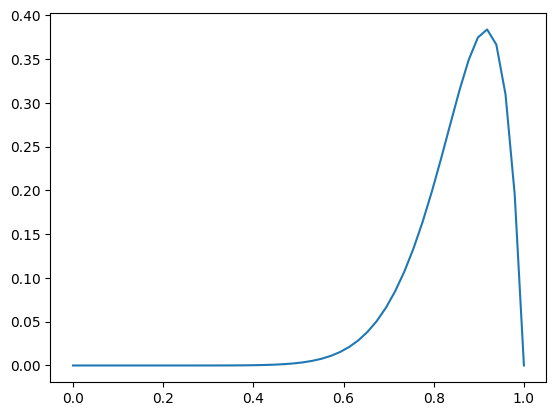

In [23]:
X = np.linspace(0,1,50)
Y = stats.binom.pmf(11, 12, X)
plt.plot(X,Y)

## Coin flipping example

> [StatQuest on binomial distribution](https://youtu.be/J8jNoF-K8E8)

In [2]:
def posterior_grid(grid_points=50, n_heads=6, n_tails=9):
    """
    A grid implementation for the coin-flipping problem
    """
    # probabilities between 0 and 1
    grid = np.linspace(0, 1, grid_points)
    # flat prior
    prior = np.repeat(1/grid_points, grid_points)
    # likelihood of each probability given observations of heads and tails
    # assumes that samples are binomially distributed
    likelihood = stats.binom.pmf(n_heads, n_heads+n_tails, grid)
    # apply bayes rule
    posterior = likelihood * prior
    posterior /= posterior.sum()
    return grid, posterior

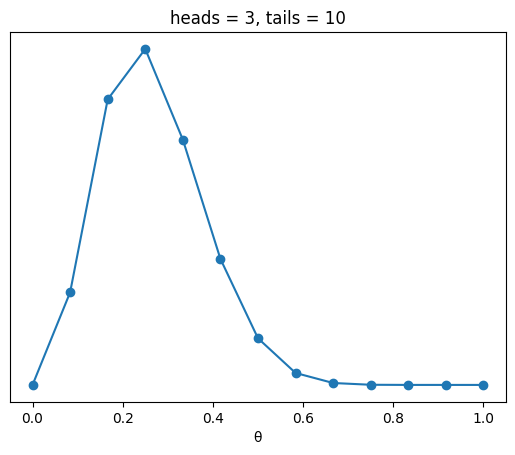

In [3]:
# tail = 0 and head = 1
TAIL = 0
HEAD = 1
data = np.repeat([TAIL, HEAD], (10, 3))
points = len(data)
n_heads = (data==HEAD).sum()
n_tails = (data==TAIL).sum()
grid, posterior = posterior_grid(points, n_heads, n_tails)
plt.plot(grid, posterior, 'o-')
 
plt.title(f'heads = {n_heads}, tails = {n_tails}')
plt.yticks([])
plt.xlabel('θ');

## Loaded Coin example

Flip a loaded coin with probability 0.6 of landing heads.

In [55]:
def sim_coin(n, p_heads=0.5):
    """
    Tails = 0
    Heads = 1
    """
    return np.random.choice(2, p=[1-p_heads, p_heads], size=n)

samples = sim_coin(10, p_heads=0.6)

prior = 0.5
help(stats.bernoulli.pmf)


# samples

# prior = np.repeat(1/6, 6)
# prior
#

Help on method pmf in module scipy.stats._distn_infrastructure:

pmf(k, *args, **kwds) method of scipy.stats._discrete_distns.bernoulli_gen instance
    Probability mass function at k of the given RV.
    
    Parameters
    ----------
    k : array_like
        Quantiles.
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        Location parameter (default=0).
    
    Returns
    -------
    pmf : array_like
        Probability mass function evaluated at k

